# Task: Covid-19 Data Analysis
### This notebook is used to understand the comprehension of Data Analysis techniques using Pandas library.

### Data Source: 
https://github.com/CSSEGISandData/COVID-19/tree/master/csse_covid_19_data/csse_covid_19_daily_reports

### File naming convention

MM-DD-YYYY.csv in UTC.

### Field description

- Province_State: China - province name; US/Canada/Australia/ - city name, state/province name; Others - name of the event (e.g., "Diamond Princess" cruise ship); other countries - blank.

- Country_Region: country/region name conforming to WHO (will be updated).

- Last_Update: MM/DD/YYYY HH:mm (24 hour format, in UTC).

- Confirmed: the number of confirmed cases. For Hubei Province: from Feb 13 (GMT +8), we report both clinically diagnosed and lab-confirmed cases. For lab-confirmed cases only (Before Feb 17), please refer to who_covid_19_situation_reports. For Italy, diagnosis standard might be changed since Feb 27 to "slow the growth of new case numbers." (Source)

- Deaths: the number of deaths.

- Recovered: the number of recovered cases.

### Question 1

#### Read the dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv(r'C:\Users\HP\06-06-2020.csv')
df

,FIPS,Admin2,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Combined_Key,Incidence_Rate,Case-Fatality_Ratio
0,45001.0,Abbeville,South Carolina,US,2020-06-07 03:53:30,34.223334,-82.461707,47,0,0,47,"Abbeville, South Carolina, US",191.625556,0.000000
1,22001.0,Acadia,Louisiana,US,2020-06-07 03:53:30,30.295065,-92.414197,500,27,0,473,"Acadia, Louisiana, US",805.866710,5.400000
2,51001.0,Accomack,Virginia,US,2020-06-07 03:53:30,37.767072,-75.632346,970,13,0,957,"Accomack, Virginia, US",3001.609110,1.340206
3,16001.0,Ada,Idaho,US,2020-06-07 03:53:30,43.452658,-116.241552,838,22,0,816,"Ada, Idaho, US",174.008019,2.625298
4,19001.0,Adair,Iowa,US,2020-06-07 03:53:30,41.330756,-94.471059,9,0,0,9,"Adair, Iowa, US",125.838926,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3707,82604.0,NaN,Wales,United Kingdom,2020-06-07 03:53:30,52.130700,-3.783700,0,2358,0,0,"Wales, United Kingdom",0.000000,0.000000
3708,NaN,NaN,NaN,Nauru,2020-06-07 03:53:30,-0.522800,166.931500,0,0,0,0,Nauru,0.000000,0.000000
3709,NaN,NaN,Niue,New Zealand,2020-06-07 03:53:30,-19.054400,-169.867200,0,0,0,0,"Niue, New Zealand",0.000000,0.000000
3710,NaN,NaN,NaN,Tuvalu,2020-06-07 03:53:30,-7.109500,177.649300,0,0,0,0,Tuvalu,0.000000,0.000000


#### Display the top 5 rows in the data

In [131]:
df['Last_Update'] = pd.to_datetime(df['Last_Update'])

In [132]:
df['Last_Update']

0      2020-06-07 03:53:30
1      2020-06-07 03:53:30
2      2020-06-07 03:53:30
3      2020-06-07 03:53:30
4      2020-06-07 03:53:30
               ...        
3707   2020-06-07 03:53:30
3708   2020-06-07 03:53:30
3709   2020-06-07 03:53:30
3710   2020-06-07 03:53:30
3711   2020-06-07 03:53:30
Name: Last_Update, Length: 3712, dtype: datetime64[ns]

In [8]:
df.head(5)

,FIPS,Admin2,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Combined_Key,Incidence_Rate,Case-Fatality_Ratio
0,45001.0,Abbeville,South Carolina,US,2020-06-07 03:53:30,34.223334,-82.461707,47,0,0,47,"Abbeville, South Carolina, US",191.625556,0.000000
1,22001.0,Acadia,Louisiana,US,2020-06-07 03:53:30,30.295065,-92.414197,500,27,0,473,"Acadia, Louisiana, US",805.866710,5.400000
2,51001.0,Accomack,Virginia,US,2020-06-07 03:53:30,37.767072,-75.632346,970,13,0,957,"Accomack, Virginia, US",3001.609110,1.340206
3,16001.0,Ada,Idaho,US,2020-06-07 03:53:30,43.452658,-116.241552,838,22,0,816,"Ada, Idaho, US",174.008019,2.625298
4,19001.0,Adair,Iowa,US,2020-06-07 03:53:30,41.330756,-94.471059,9,0,0,9,"Adair, Iowa, US",125.838926,0.000000


#### Show the information of the dataset

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3712 entries, 0 to 3711
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   FIPS                 3041 non-null   float64
 1   Admin2               3041 non-null   object 
 2   Province_State       3533 non-null   object 
 3   Country_Region       3712 non-null   object 
 4   Last_Update          3712 non-null   object 
 5   Lat                  3636 non-null   float64
 6   Long_                3636 non-null   float64
 7   Confirmed            3712 non-null   int64  
 8   Deaths               3712 non-null   int64  
 9   Recovered            3712 non-null   int64  
 10  Active               3712 non-null   int64  
 11  Combined_Key         3712 non-null   object 
 12  Incidence_Rate       3636 non-null   float64
 13  Case-Fatality_Ratio  3646 non-null   float64
dtypes: float64(5), int64(4), object(5)
memory usage: 406.1+ KB


#### Show the sum of missing values of features in the dataset

In [11]:
df.isna().sum()

FIPS                   671
Admin2                 671
Province_State         179
Country_Region           0
Last_Update              0
Lat                     76
Long_                   76
Confirmed                0
Deaths                   0
Recovered                0
Active                   0
Combined_Key             0
Incidence_Rate          76
Case-Fatality_Ratio     66
dtype: int64

### Question 2

#### Show the number of Confirmed cases by Country

In [32]:
df.loc[:,['Country_Region','Confirmed']].groupby('Country_Region').sum()

,Confirmed
Country_Region,
Afghanistan,19637
Albania,1232
Algeria,10050
Andorra,852
Angola,88
...,...
West Bank and Gaza,464
Winter Olympics 2022,0
Yemen,482


#### Show the number of Deaths by Country

In [45]:
df.groupby('Country_Region')['Deaths'].sum()

Country_Region
Afghanistan             331
Albania                  34
Algeria                 698
Andorra                  51
Angola                    4
                       ... 
West Bank and Gaza        3
Winter Olympics 2022      0
Yemen                   111
Zambia                    7
Zimbabwe                  4
Name: Deaths, Length: 197, dtype: int64

#### Show the number of Recovered cases by Country

In [46]:
df.groupby('Country_Region')['Recovered'].sum()

Country_Region
Afghanistan             1830
Albania                  925
Algeria                 6631
Andorra                  741
Angola                    24
                        ... 
West Bank and Gaza       400
Winter Olympics 2022       0
Yemen                     23
Zambia                   912
Zimbabwe                  33
Name: Recovered, Length: 197, dtype: int64

#### Show the number of Active Cases by Country

In [47]:
df.loc[:,['Country_Region','Active']].groupby('Country_Region').sum()

,Active
Country_Region,
Afghanistan,17476
Albania,273
Algeria,2721
Andorra,60
Angola,60
...,...
West Bank and Gaza,61
Winter Olympics 2022,0
Yemen,348


#### Show the latest number of Confirmed, Deaths, Recovered and Active cases Country-wise

In [50]:
df.groupby('Country_Region')[['Confirmed','Deaths','Recovered','Active']].sum()

,Confirmed,Deaths,Recovered,Active
Country_Region,,,,
Afghanistan,19637,331,1830,17476
Albania,1232,34,925,273
Algeria,10050,698,6631,2721
Andorra,852,51,741,60
Angola,88,4,24,60
...,...,...,...,...
West Bank and Gaza,464,3,400,61
Winter Olympics 2022,0,0,0,0
Yemen,482,111,23,348


### Question 3

### Show the countries with no recovered cases

In [99]:
df.columns

Index(['FIPS', 'Admin2', 'Province_State', 'Country_Region', 'Last_Update',
       'Lat', 'Long_', 'Confirmed', 'Deaths', 'Recovered', 'Active',
       'Combined_Key', 'Incidence_Rate', 'Case-Fatality_Ratio'],
      dtype='object')

In [100]:
group1= df.groupby('Country_Region')['Recovered'].sum().reset_index()

In [103]:
res = group1[group1['Recovered'] == 0]
print(res)

           Country_Region  Recovered
5              Antarctica          0
92               Kiribati          0
93           Korea, North          0
107            MS Zaandam          0
124                 Nauru          0
135                 Palau          0
150                 Samoa          0
167  Summer Olympics 2020          0
169                Sweden          0
178                 Tonga          0
182                Tuvalu          0
193  Winter Olympics 2022          0


#### Show the countries with no confirmed cases

In [107]:
group2 = df.groupby('Country_Region')['Confirmed'].sum().reset_index()
res2 = group2[group2['Confirmed'] == 0]
print(res2)

           Country_Region  Confirmed
5              Antarctica          0
92               Kiribati          0
93           Korea, North          0
124                 Nauru          0
135                 Palau          0
150                 Samoa          0
167  Summer Olympics 2020          0
178                 Tonga          0
182                Tuvalu          0
193  Winter Olympics 2022          0


#### Show the countries with no deaths

In [119]:
group3 = df.groupby('Country_Region')['Deaths'].sum().reset_index()
res3 = group3[group3['Deaths']==0].head(10)
print(res3)

   Country_Region  Deaths
5      Antarctica       0
20         Bhutan       0
31       Cambodia       0
51       Dominica       0
57        Eritrea       0
61           Fiji       0
70        Grenada       0
76       Holy See       0
92       Kiribati       0
93   Korea, North       0


In [118]:
group4 = df.groupby('Country_Region')[['Confirmed','Deaths','Recovered']].sum().reset_index()
res4 = group4[group4['Deaths']==0].head(10)
print(res4)

   Country_Region  Confirmed  Deaths  Recovered
5      Antarctica          0       0          0
20         Bhutan         48       0         11
31       Cambodia        125       0        123
51       Dominica         18       0         16
57        Eritrea         39       0         39
61           Fiji         18       0         18
70        Grenada         23       0         22
76       Holy See         12       0         12
92       Kiribati          0       0          0
93   Korea, North          0       0          0


### Question 4

#### Show the Top 10 countries with Confirmed cases

In [138]:
top10 = df.groupby(['Country_Region','Last_Update'])[['Confirmed','Deaths','Recovered']].sum().reset_index()
r1 = top10.sort_values(by=['Confirmed'], ascending=False ).head(10)
print(r1)

     Country_Region         Last_Update  Confirmed  Deaths  Recovered
183              US 2020-06-07 03:53:30    1924891  110179     500849
24           Brazil 2020-06-07 03:53:30     676893   36054     277149
145          Russia 2020-06-07 03:53:30     458102    5717     220935
188  United Kingdom 2020-06-07 03:53:30     286288   53723       1230
80            India 2020-06-07 03:53:30     246622    6946     118695
164           Spain 2020-06-07 03:53:30     241310   27135     150376
86            Italy 2020-06-07 03:53:30     234801   33846     165078
63           France 2020-06-07 03:53:30     192890   29145      70924
139            Peru 2020-06-07 03:53:30     191758   24225      82731
67          Germany 2020-06-07 03:53:30     185293    8646     168958


#### Show the Top 10 Countries with Active cases

In [137]:
active_case = df.groupby(['Country_Region','Last_Update'])[['Confirmed','Deaths','Recovered','Active']].sum().reset_index()
r2 = active_case.sort_values(by = 'Active', ascending=False).head(10)
print(r2)

     Country_Region         Last_Update  Confirmed  Deaths  Recovered   Active
183              US 2020-06-07 03:53:30    1924891  110179     500849  1817737
24           Brazil 2020-06-07 03:53:30     676893   36054     277149   636916
188  United Kingdom 2020-06-07 03:53:30     286288   53723       1230   244516
145          Russia 2020-06-07 03:53:30     458102    5717     220935   231450
139            Peru 2020-06-07 03:53:30     191758   24225      82731   167533
36            Chile 2020-06-07 03:53:30     127745    1541     103817   126204
80            India 2020-06-07 03:53:30     246622    6946     118695   120981
63           France 2020-06-07 03:53:30     192890   29145      70924    92821
164           Spain 2020-06-07 03:53:30     241310   27135     150376    69592
134        Pakistan 2020-06-07 03:53:30      93983    1935      32581    59467


### Question 5

#### Plot Country-wise Total deaths, confirmed, recovered and active casaes where total deaths have exceeded 50,000

In [16]:
import matplotlib.pyplot as plt

In [3]:
df.columns

Index(['FIPS', 'Admin2', 'Province_State', 'Country_Region', 'Last_Update',
       'Lat', 'Long_', 'Confirmed', 'Deaths', 'Recovered', 'Active',
       'Combined_Key', 'Incidence_Rate', 'Case-Fatality_Ratio'],
      dtype='object')

     Country_Region  Deaths  Confirmed  Recovered   Active
183              US  110179    1924904     500849  1817750
187  United Kingdom   53723     286288       1230   244516


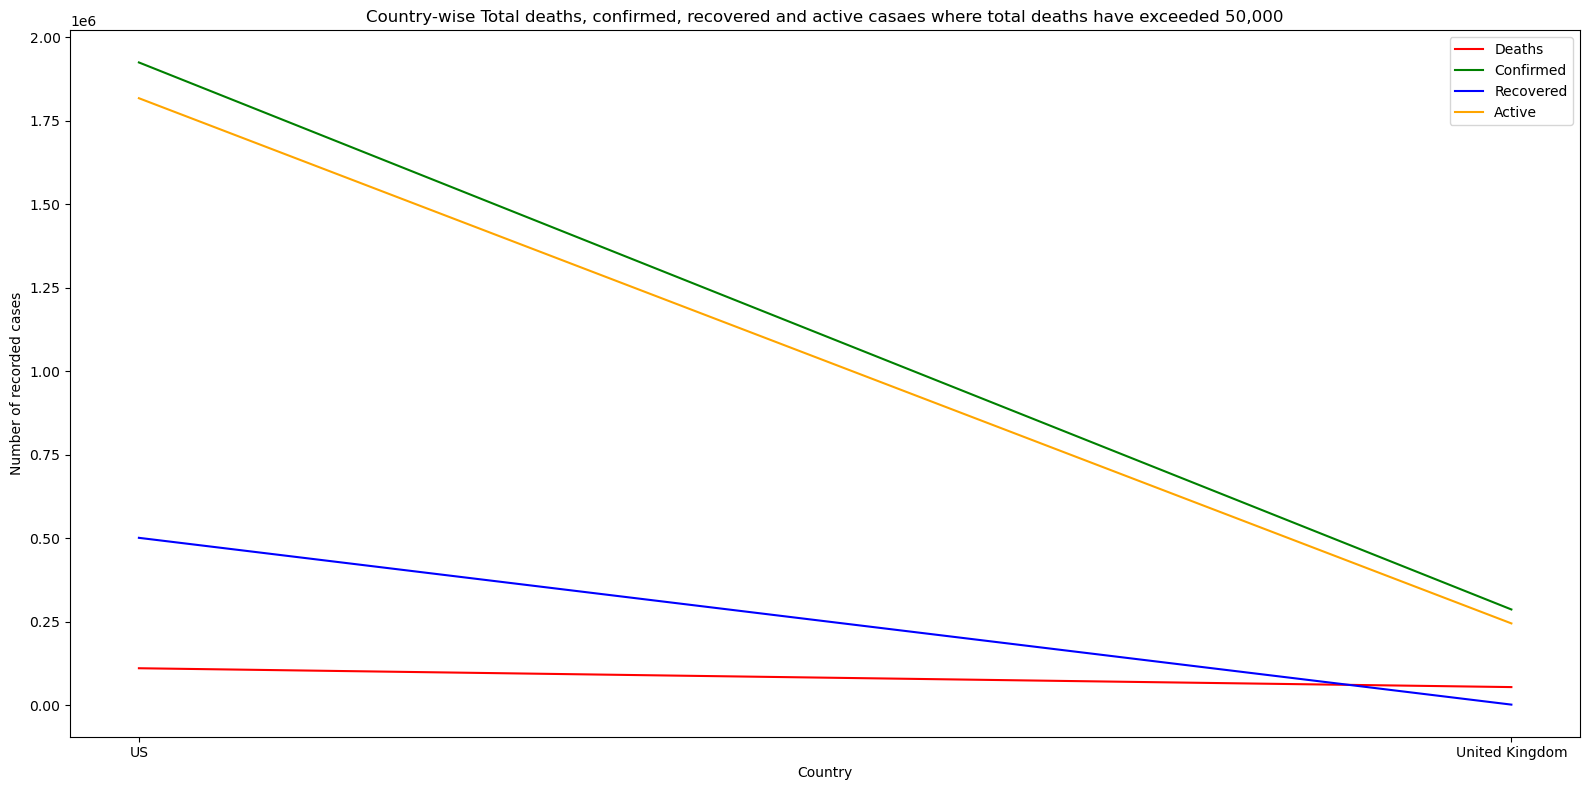

In [6]:
graph_1 = df.groupby('Country_Region')[['Deaths','Confirmed','Recovered','Active']].sum().reset_index()
output_1 = graph_1[graph_1['Deaths'] > 50000].head()
print(output_1)


plt.figure(figsize=(16,8))

plt.plot(output_1['Country_Region'], output_1['Deaths'], linestyle='-', color='red', label='Deaths')
plt.plot(output_1['Country_Region'], output_1['Confirmed'], linestyle='-', color='green', label='Confirmed')
plt.plot(output_1['Country_Region'], output_1['Recovered'], linestyle='-', color='blue', label='Recovered')
plt.plot(output_1['Country_Region'], output_1['Active'], linestyle='-', color='orange', label='Active')

plt.xlabel('Country')
plt.ylabel('Number of recorded cases')
plt.title('Country-wise Total deaths, confirmed, recovered and active casaes where total deaths have exceeded 50,000')
plt.legend()
plt.tight_layout()

### Question 6

### Plot Province/State wise Deaths in USA

In [7]:
import plotly.express as px

In [8]:
covid_data= pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/01-09-2021.csv')

In [9]:
covid_data.columns

Index(['FIPS', 'Admin2', 'Province_State', 'Country_Region', 'Last_Update',
       'Lat', 'Long_', 'Confirmed', 'Deaths', 'Recovered', 'Active',
       'Combined_Key', 'Incident_Rate', 'Case_Fatality_Ratio'],
      dtype='object')

In [22]:
covid_data.head()

,FIPS,Admin2,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Combined_Key,Incident_Rate,Case_Fatality_Ratio
0,NaN,NaN,NaN,Afghanistan,2021-01-10 05:22:12,33.93911,67.709953,53400,2264,43740,7396,Afghanistan,137.175124,4.239700
1,NaN,NaN,NaN,Albania,2021-01-10 05:22:12,41.15330,20.168300,63033,1233,37327,24473,Albania,2190.318994,1.956118
2,NaN,NaN,NaN,Algeria,2021-01-10 05:22:12,28.03390,1.659600,101913,2803,69011,30099,Algeria,232.407243,2.750385
3,NaN,NaN,NaN,Andorra,2021-01-10 05:22:12,42.50630,1.521800,8586,85,7724,777,Andorra,11112.405358,0.989984
4,NaN,NaN,NaN,Angola,2021-01-10 05:22:12,-11.20270,17.873900,18156,416,13205,4535,Angola,55.242049,2.291254


In [26]:
country_1 = covid_data[covid_data['Country_Region'] == 'US']
deaths_us = country_1.groupby('Province_State')['Deaths'].sum().reset_index()


fig = px.bar(deaths_us, x= 'Province_State', y= 'Deaths', title='Total number of deaths in USA in each province')
fig.show()

### Question 7

### Plot Province/State Wise Active Cases in USA

In [27]:
country_1 = covid_data[covid_data['Country_Region'] == 'US']
deaths_us = country_1.groupby('Province_State')['Active'].sum().reset_index()


fig = px.bar(deaths_us, x= 'Province_State', y= 'Active', title='Total number of Active cases in USA in each province')
fig.show()

### Question 8

### Plot Province/State Wise Confirmed cases in USA

In [31]:
country_1 = covid_data[covid_data['Country_Region'] == 'US']
deaths_us = country_1.groupby('Province_State')['Confirmed'].sum().reset_index()


fig = px.bar(deaths_us, x= 'Province_State', y= 'Confirmed', title='Total number of Confirmed cases in USA in each province')
fig.show()

### Question 9

### Plot Worldwide Confirmed Cases over time

In [32]:
import plotly.express as px
import plotly.io as pio

In [33]:
covid_data.columns

Index(['FIPS', 'Admin2', 'Province_State', 'Country_Region', 'Last_Update',
       'Lat', 'Long_', 'Confirmed', 'Deaths', 'Recovered', 'Active',
       'Combined_Key', 'Incident_Rate', 'Case_Fatality_Ratio'],
      dtype='object')

In [36]:
covid_data['Last_Update'] = pd.to_datetime(covid_data['Last_Update'])

world = covid_data.groupby('Last_Update')['Confirmed'].sum().reset_index()

fig = px.line(covid_data, x= 'Last_Update', y='Confirmed', 
              title='Worldwide Confirm Novel Coronavirus(Covid-19) cases over time')
fig.show()